# This will be the notebook for data cleaning

In [122]:
import sys
sys.path.append("/media/allano/53CE082D539E52ED/_DS_ML_DL/plots_and_land_for_sale_Kenya/seller_segmentation_and_targeting/data_cleaning")
from data_cleaner_and_processor import DataProcessor, ExtractVariables


In [123]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
pd.set_option('display.max_colwidth', None)

In [125]:
dataset_url = "/media/allano/53CE082D539E52ED/_DS_ML_DL/plots_and_land_for_sale_Kenya/datasets/land_and_plots_for_sale.csv"
import data_ingestion

In [126]:
data = data_ingestion.read_dataset(dataset_url)

2025-08-14 07:09:30 - data_ingestion - INFO - data_injestion.py:71 - Success! File loaded into a pandas dataframe


In [127]:

processor = DataProcessor()
vars_extractor = ExtractVariables()
data = processor.process(data)
data = vars_extractor.extract(data)

2025-08-14 07:09:32 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 87-Success. Size fields extracted and filled
2025-08-14 07:09:32 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 295-Successfully preprocessed 'size' column for enhanced fraction parsing
2025-08-14 07:09:32 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 244-Successfully created 'acreage' column with converted values
2025-08-14 07:09:32 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 267-Cleaning Success !! price_view_col dropped, price column cleaned
2025-08-14 07:09:32 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 311-Successfully processed DataFrame through all steps
2025-08-14 07:09:34 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 431-Successfully extracted county information
2025-08-14 07:09:34 - data_cleaner_and_processor - INFO - cleaner_and_processor.py : 434-Successfully extracted and cleaned time on jiji


In [128]:
pd.set_option('display.float_format', '{:,.4f}'.format)
data_1 = data.copy()


In [129]:
data.drop(columns= ['title','price_in_KES', 'region', 'region_name', 'property_details',
                'region_parent_name','short_description','listing_by', 'user_id', 'is_owner',
                'can_view_contacts', 'status',   'property_url', 'images_count', 'badge_label', 
                'guid', 'id', 'facilities', 'description', 'is_boost', 'price_period', 
                'land_area', 'category_name', 'property_address'],
        inplace=True
)
data.head()

,property_type,property_use,seller_or_agent_name,size,acreage,price_per_acre(KES),county,county_population_density(2019),years_on_jiji
0,Mixed-Use Land,Mixed,Eyelift Properties,32 acres,32.0000,"5,000,000.0000",Machakos,236,0.0833
1,Commercial Land,Mixed,Eyelift Properties,4 acre,4.0000,"55,000,000.0000",Machakos,236,0.0833
2,Mixed-Use Land,Mixed,Eyelift Properties,8.5 acre,8.5000,"17,000,000.0000",Machakos,236,0.0833
3,Residential Land,Residential,Eyelift Properties,50 x100,0.1148,"23,522,400.0000",Machakos,236,0.0833
4,Residential Land,Residential,Homely Realtors,One Acre,1.0000,"22,000,000.0000",Kajiado,51,6.0833


# Descriptive Statistics
Frequency Analysis and Segment Profiling
The objective is to Summarize listing distribution to identify dominant seller segments


# 1. Analysis of Sellers

In [130]:
data['seller_or_agent_name'].isnull().sum() #No null sellers
data['seller_or_agent_name'].info()

<class 'pandas.core.series.Series'>
Index: 7286 entries, 0 to 10256
Series name: seller_or_agent_name
Non-Null Count  Dtype 
--------------  ----- 
7286 non-null   object
dtypes: object(1)
memory usage: 113.8+ KB


In [131]:
data['seller_or_agent_name'].nunique() #We have 2388 sellers who listed their property on jiji

2388

In [132]:
top_ten_listers = (
    data.groupby("seller_or_agent_name")["seller_or_agent_name"]
        .count()
        .reset_index(name="count")              # keep seller names as a column
        .sort_values(by="count", ascending=False) # sort highest first
        .head(10)                                # take top 10
)

top_ten_listers


,seller_or_agent_name,count
2313,https://fanaka.co.ke/,269
521,Eldoret City REAL estate,226
813,Homely Realtors,191
395,David Mathenge,138
2005,Simon,118
2009,Simon Mwangi,113
1731,Peter M Ndungu,108
386,David,98
787,Harrison Wahome,92
1456,Miliki Investments properties,86


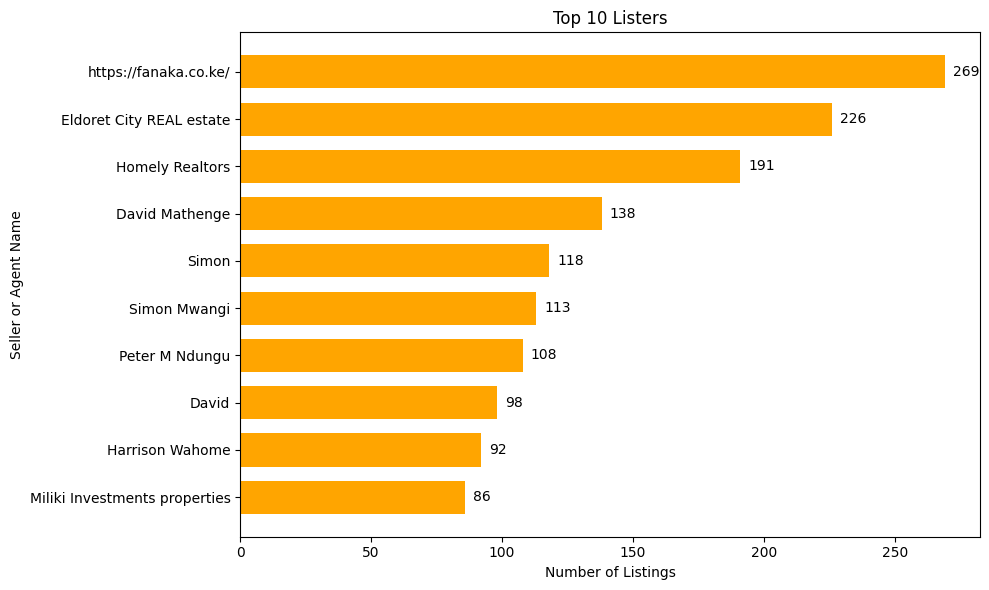

In [133]:
plt.figure(figsize=(10,6))
bars = plt.barh(
    top_ten_listers["seller_or_agent_name"],
    top_ten_listers["count"],
    color="orange",
    height=0.7  # thinner bars
)

# Add value labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 3,            # a little to the right of the bar
        bar.get_y() + bar.get_height()/2,
        str(int(bar.get_width())),
        va='center'
    )

plt.xlabel("Number of Listings")
plt.ylabel("Seller or Agent Name")
plt.title("Top 10 Listers")
plt.gca().invert_yaxis()  # largest at top
plt.tight_layout()
plt.show()

# Lets focus more on individual listers

In [134]:
data.head()

,property_type,property_use,seller_or_agent_name,size,acreage,price_per_acre(KES),county,county_population_density(2019),years_on_jiji
0,Mixed-Use Land,Mixed,Eyelift Properties,32 acres,32.0000,"5,000,000.0000",Machakos,236,0.0833
1,Commercial Land,Mixed,Eyelift Properties,4 acre,4.0000,"55,000,000.0000",Machakos,236,0.0833
2,Mixed-Use Land,Mixed,Eyelift Properties,8.5 acre,8.5000,"17,000,000.0000",Machakos,236,0.0833
3,Residential Land,Residential,Eyelift Properties,50 x100,0.1148,"23,522,400.0000",Machakos,236,0.0833
4,Residential Land,Residential,Homely Realtors,One Acre,1.0000,"22,000,000.0000",Kajiado,51,6.0833


In [135]:
def plot_property_distribution(seller_or_agent: str):
    seller_df = data[data['seller_or_agent_name']== seller_or_agent]
    seller_df = (
        seller_df.groupby('property_use').size()
        .reset_index(name = 'land_use_count')
        .sort_values(by = 'land_use_count', ascending=False)
    )
    
    values = seller_df['land_use_count'].values
    labels = seller_df['property_use'].values
    
    plt.figure(figsize=(7, 7), dpi = 100)
    colors = plt.cm.Dark2(np.linspace(0,1, len(labels)))
    wedges, texts, autotexts = plt.pie(
        values,
        labels = labels,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        wedgeprops={'width': 0.4, 'edgecolor': 'white'}
        )
    
    for text in texts:
        text.set_fontsize(12)
        
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('white')
        
    plt.gca().add_artist(plt.Circle((0, 0), 0.4, color = 'white'))
    plt.gca().set_aspect('equal')
    plt.title(f"Distribution of {seller_or_agent}'s property by use")
    plt.tight_layout()
    plt.show()

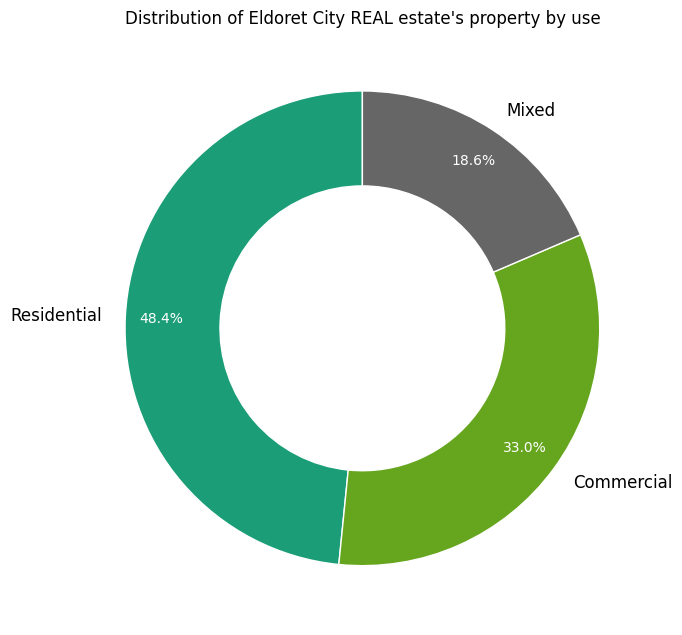

In [136]:
input_str = top_ten_listers['seller_or_agent_name'].iloc[1:2].values[0]
plot_property_distribution(input_str)

In [137]:
def plot_county_distribution(seller_or_agent: str):
    seller_data = data[data['seller_or_agent_name'] == seller_or_agent]
    seller_data = (
            seller_data.groupby(by = 'county')['county' ].count()
            .reset_index(name = 'Count of Listings')
            .sort_values(by = 'Count of Listings' , ascending = False )
    ).head(4)

    values = seller_data['Count of Listings'].values
    labels = seller_data['county'].values

    # Create figure
    plt.figure(figsize=(8, 8), dpi=100)

    # Define colors
    colors = plt.cm.Dark2(np.linspace(0, 1, len(labels)))

    # Create pie chart with wedgeprops for doughnut effect
    wedges, texts, autotexts = plt.pie( # pyright: ignore[reportAssignmentType]
        values,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=30,
        pctdistance=0.80,
        wedgeprops={'width': 0.4, 'edgecolor': 'white'}
    )

    # Customize text
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('white')

    # Add center circle for doughnut
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

    # Ensure circular shape
    plt.gca().set_aspect('equal')

    # Add title
    plt.title(f"Distribution of {seller_or_agent}'s property listings by county", fontsize=12, pad=20)

    # Display
    plt.tight_layout()
    plt.show()

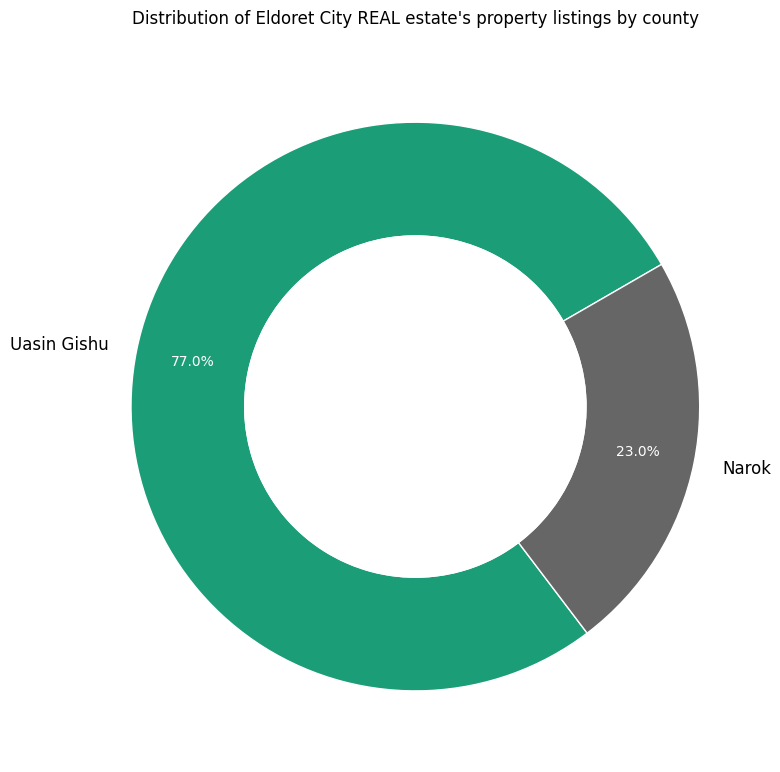

In [138]:
input_str = top_ten_listers['seller_or_agent_name'].iloc[1:2].values[0]
plot_county_distribution(input_str)

## check sellers and how old they are on jiji platform

In [139]:
data['seller_status'] = data['years_on_jiji'].apply(
    lambda x: "New Seller" if 0.0000<= x <= 1.0000 else ("Established Seller"  if  1.0000<= x <= 4.0000 else "Long-standing Seller")
)
data.head()

,property_type,property_use,seller_or_agent_name,size,acreage,price_per_acre(KES),county,county_population_density(2019),years_on_jiji,seller_status
0,Mixed-Use Land,Mixed,Eyelift Properties,32 acres,32.0000,"5,000,000.0000",Machakos,236,0.0833,New Seller
1,Commercial Land,Mixed,Eyelift Properties,4 acre,4.0000,"55,000,000.0000",Machakos,236,0.0833,New Seller
2,Mixed-Use Land,Mixed,Eyelift Properties,8.5 acre,8.5000,"17,000,000.0000",Machakos,236,0.0833,New Seller
3,Residential Land,Residential,Eyelift Properties,50 x100,0.1148,"23,522,400.0000",Machakos,236,0.0833,New Seller
4,Residential Land,Residential,Homely Realtors,One Acre,1.0000,"22,000,000.0000",Kajiado,51,6.0833,Long-standing Seller


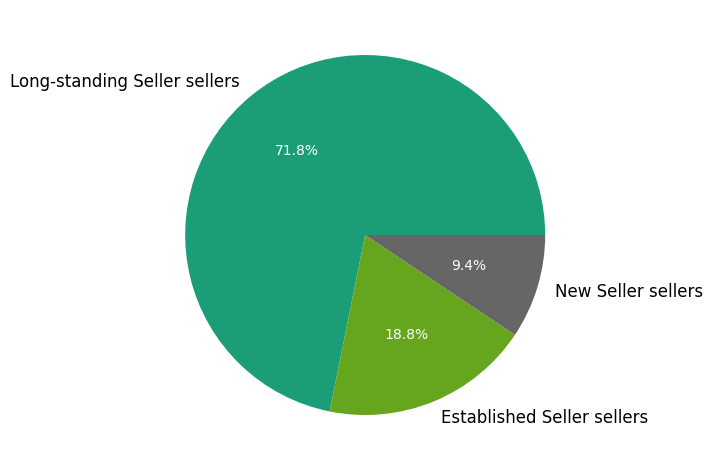

In [140]:
seller_age = data.groupby(by = 'seller_status')['seller_status'].count().reset_index(name = "seller_status_count").sort_values(by= "seller_status_count", ascending=False)
values = seller_age['seller_status_count'].values
labels = seller_age['seller_status'].values
colors = plt.cm.Dark2(np.linspace(0, 1, len(labels)))
# Create pie chart with wedgeprops for doughnut effect
wedges, texts, autotexts = plt.pie( # pyright: ignore[reportAssignmentType]
        values,
        labels= [f"{label} sellers" for label in labels],
        colors=colors,
        autopct='%1.1f%%',
        
    )

    # Customize text
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')
plt.tight_layout()
plt.show()

## A very big majority of the sellers are really old enough on jiji. Interesting. Let's dive deep into these older sellers and see where most of list there property from. And which property listings they list, mostly. 

In [141]:
def visualize_seller_distributions(seller_status: str, data: pd.DataFrame):
    """
    Generate two donut charts side by side showing the distribution of a seller's
    property listings by county and by property use.
    
    Args:
        seller_status (str): The seller or agent name to filter the data.
        data (pd.DataFrame): DataFrame with columns 'seller_or_agent_name', 'county',
                            'seller_status', and 'property_use'.
    """
    # Initialize figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=100)

    # --- County Distribution ---
    county_data = data[data['seller_status'] == seller_status]
    if county_data.empty:
        ax1.text(0.5, 0.5, f"No data for {seller_status} (county)", ha='center', va='center', fontsize=12)
        ax1.set_aspect('equal')
        ax1.set_title(f"Distribution of {seller_status}'s Listings by County", fontsize=12, pad=20)
    else:
        county_data = (
            county_data.groupby('county')['county'].count()
            .reset_index(name='Count of Listings')
            .sort_values(by='Count of Listings', ascending=False)
        ).head(4)

        county_values = county_data['Count of Listings'].values
        county_labels = county_data['county'].values

        # Plot county donut chart
        county_colors = plt.cm.Dark2(np.linspace(0, 1, len(county_labels)))
        wedges1, texts1, autotexts1 = ax1.pie(
            county_values,
            labels=county_labels,
            colors=county_colors,
            autopct='%1.1f%%',
            startangle=30,
            pctdistance=0.80,
            wedgeprops={'width': 0.4, 'edgecolor': 'white'}
        )

        # Customize county plot text
        for text in texts1:
            text.set_fontsize(12)
        for autotext in autotexts1:
            autotext.set_fontsize(12)
            autotext.set_color('white')

        # Add center circle for county donut
        ax1.add_artist(plt.Circle((0, 0), 0.6, color='white'))
        ax1.set_aspect('equal')
        ax1.set_title(f"Distribution of {seller_status}'s Listings by County", fontsize=17, pad=20)

    # --- Property Use Distribution ---
    use_data = data[data['seller_status'] == seller_status]
    if use_data.empty:
        ax2.text(0.5, 0.5, f"No data for {seller_status} (property use)", ha='center', va='center', fontsize=12)
        ax2.set_aspect('equal')
        ax2.set_title(f"Distribution of {seller_status}'s Listings by Property Use", fontsize=17, pad=20)
    else:
        use_data = (
            use_data.groupby('property_use').size()
            .reset_index(name='land_use_count')
            .sort_values(by='land_use_count', ascending=False)
        )

        use_values = use_data['land_use_count'].values
        use_labels = use_data['property_use'].values

        # Plot property use donut chart
        use_colors = plt.cm.Dark2(np.linspace(0, 1, len(use_labels)))
        wedges2, texts2, autotexts2 = ax2.pie(
            use_values,
            labels=use_labels,
            colors=use_colors,
            autopct='%1.1f%%',
            startangle=90,
            pctdistance=0.85,
            wedgeprops={'width': 0.4, 'edgecolor': 'white'}
        )

        # Customize property use plot text
        for text in texts2:
            text.set_fontsize(12)
        for autotext in autotexts2:
            autotext.set_fontsize(12)
            autotext.set_color('white')

        # Add center circle for property use donut
        ax2.add_artist(plt.Circle((0, 0), 0.4, color='white'))
        ax2.set_aspect('equal')
        ax2.set_title(f"Distribution of {seller_status}'s Listings by Property Use", fontsize=17, pad=20)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

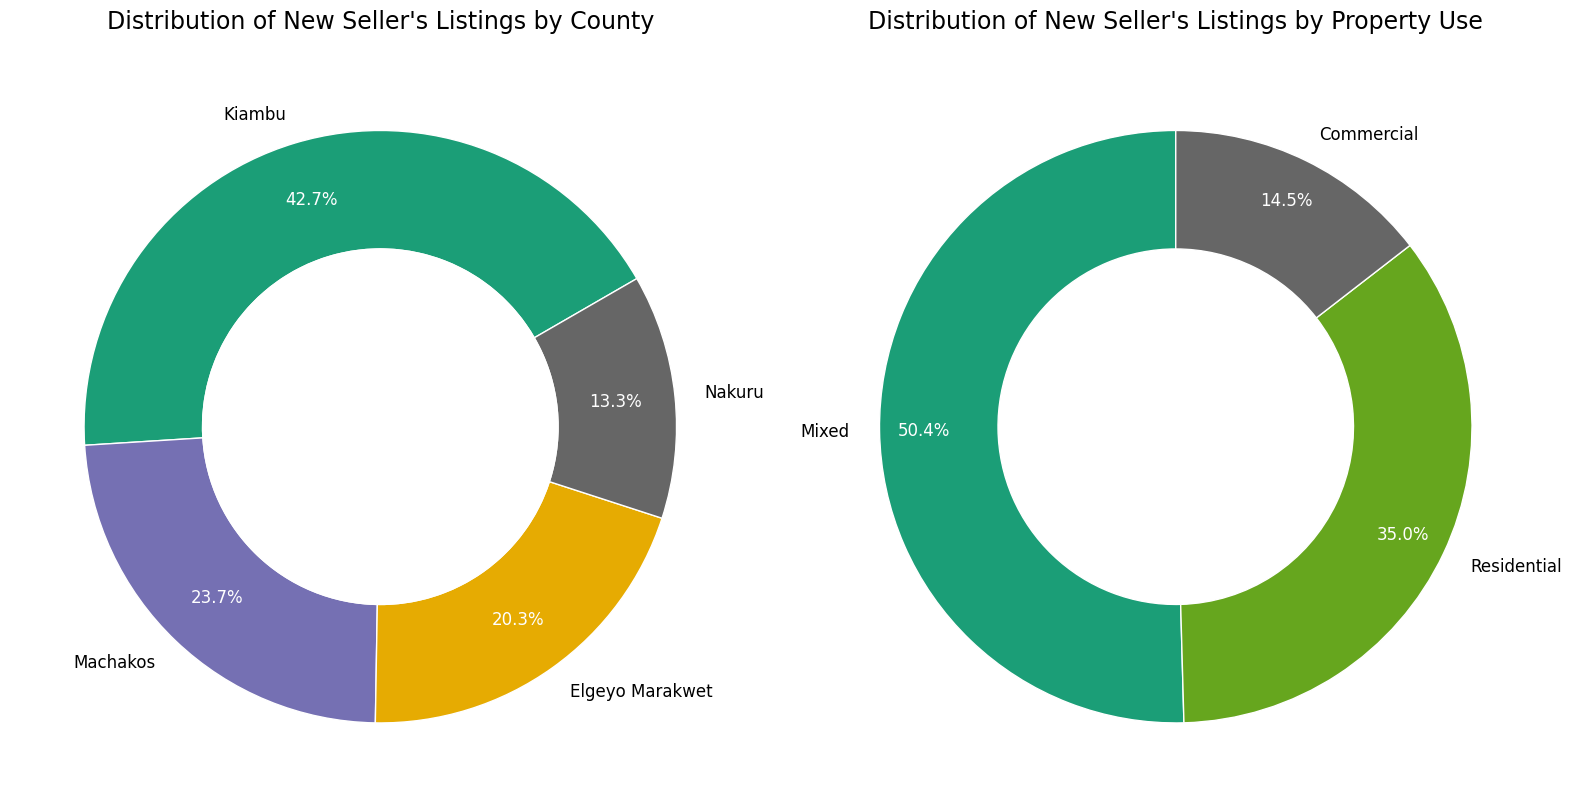

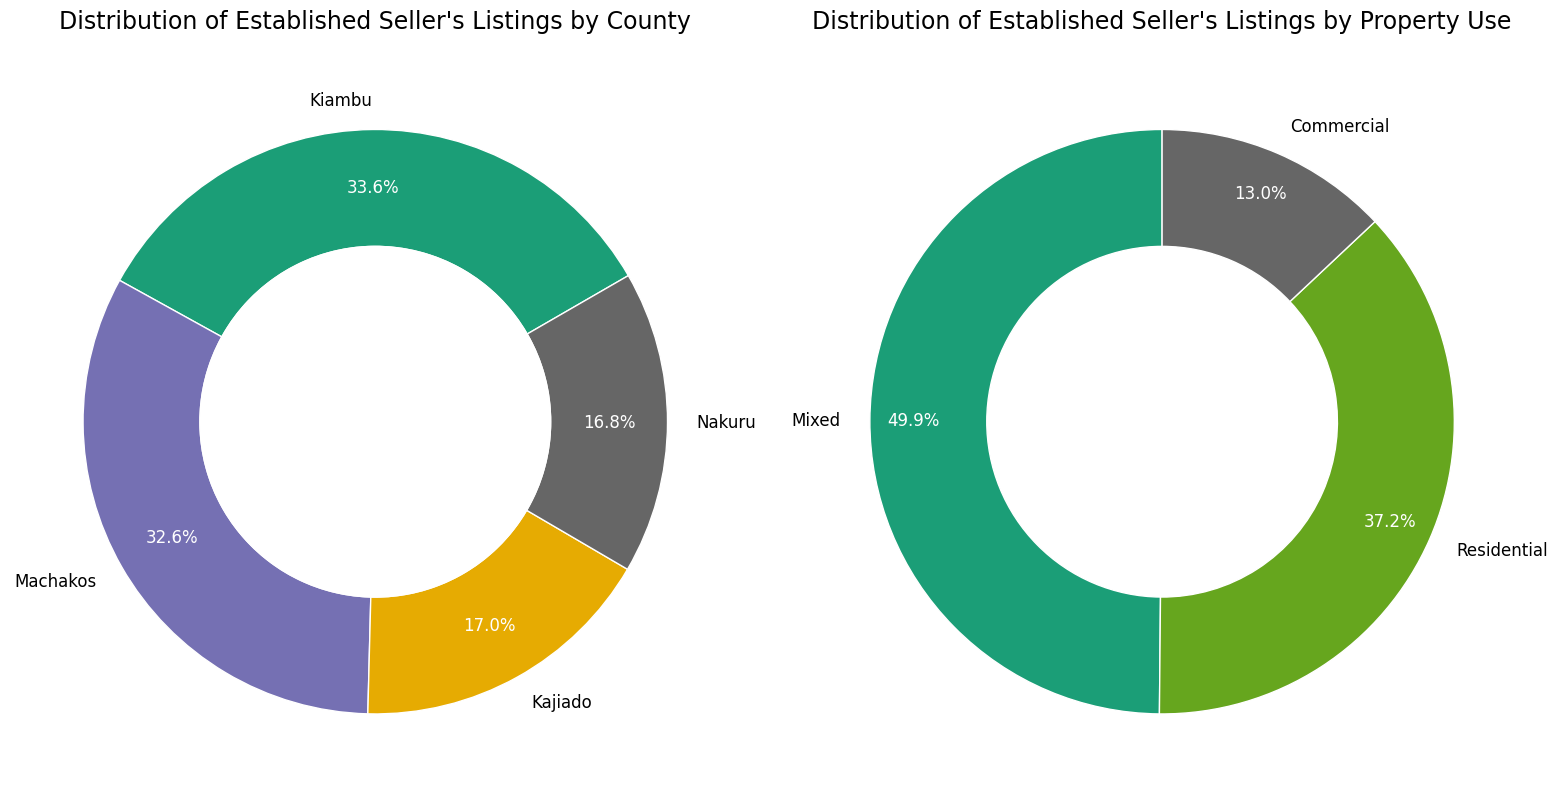

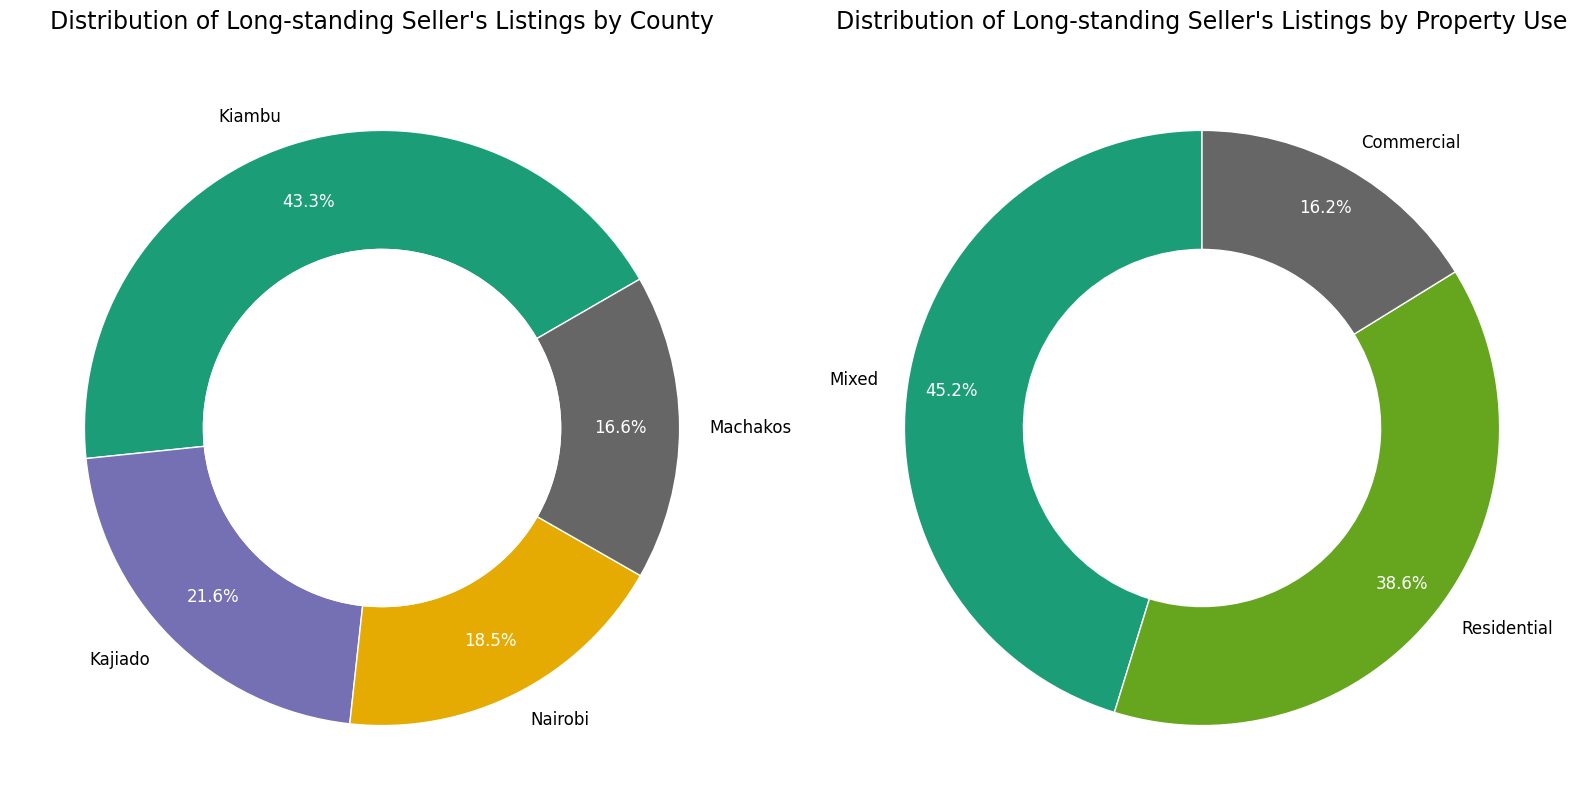

In [142]:
visualize_seller_distributions('New Seller', data)
visualize_seller_distributions('Established Seller', data)
visualize_seller_distributions('Long-standing Seller', data)

## We will be back with summaries about the above insights